<a href="https://colab.research.google.com/github/SouravDasz/practice/blob/main/resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [39]:
df=pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [40]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [41]:
df["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


In [42]:
nltk.download('stopwords')
def preprocess(text):
  ps = PorterStemmer() # Create an instance of PorterStemmer
  text=re.sub("[^a-zA-Z]"," ",text)
  text=text.lower()
  text=text.split()
  text=[ps.stem(word) for word in text if word not in stopwords.words("english")] # Use the instance to call stem()
  text= " ".join(text)

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df["Resume"]=df["Resume"].apply(preprocess)

In [44]:
df.head()

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ detail may may b e uit rgpv data scientis...
2,Data Science,area interest deep learn control system design...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ detail mca ymcaust faridabad haryana data...


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=5000)

vector=tfidf.fit_transform(df["Resume"])

In [46]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df["class"]=encoder.fit_transform(df["Category"])

In [47]:
df.head(

)

,Category,Resume,class
0,Data Science,skill program languag python panda numpi scipi...,6
1,Data Science,educ detail may may b e uit rgpv data scientis...,6
2,Data Science,area interest deep learn control system design...,6
3,Data Science,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,educ detail mca ymcaust faridabad haryana data...,6


In [48]:
df["class"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [49]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [50]:

vector=vector.toarray()


In [51]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.naive_bayes import CategoricalNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

x,y=vector,df["class"]

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [78]:
nb=CategoricalNB()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
mb=MultinomialNB()
gb=GaussianNB()

mb.fit(x_train,y_train)
gb.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [162]:
from sklearn.metrics import accuracy_score

nb_pred = nb.predict(x_test)
knn_pred = knn.predict(x_test)
rf_pred = rf.predict(x_test)
mb_pred = mb.predict(x_test)
gb_pred = gb.predict(x_test)

print("nb accuracy is -->", accuracy_score(y_test, nb_pred))
print("mb accuracy is -->", accuracy_score(y_test, mb_pred))
print("gb accuracy is -->", accuracy_score(y_test, gb_pred))
print("knn accuracy is -->", accuracy_score(y_test, knn_pred))
print("rf accuracy is -->", accuracy_score(y_test, rf_pred))

nb accuracy is --> 0.07772020725388601
mb accuracy is --> 0.9585492227979274
gb accuracy is --> 0.9948186528497409
knn accuracy is --> 0.9844559585492227
rf accuracy is --> 1.0


<Axes: xlabel='class', ylabel='count'>

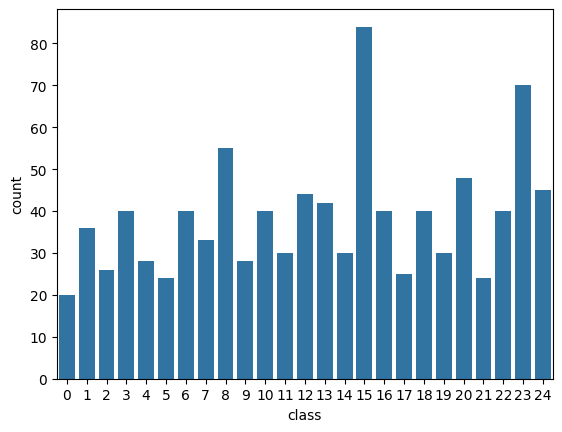

In [61]:
import seaborn as sns
sns.countplot(x=df["class"])

In [82]:
rf.predict([vector[511]])

array([18])

In [63]:
df.shape

(962, 3)

In [83]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
pred=model.predict(x_test)

print("accuracy is ",accuracy_score(y_test,pred))

accuracy is  1.0


In [160]:
def scanner(text):
  text=re.sub("[^a-zA-Z]"," ",text)
  ps = PorterStemmer()
  text=text.lower()
  text=text.split()
  text=[ps.stem(word) for word in text if word not in stopwords.words("english")]
  text=" ".join(text)

  vector=tfidf.transform([text])

  vector=vector.toarray()
  x=model.predict(vector)[0]

  role=df[df['class']==x].iloc[0][0]

  return role




In [133]:
role=df[df['class']==6].iloc[0][0]


Data Science


/tmp/ipython-input-147177410.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  role=df[df['class']==6].iloc[0][0]


In [134]:
print(role)

Data Science


In [166]:
value=scanner("Skills Ã¢Â€Â¢ Python Ã¢Â€Â¢ Tableau Ã¢Â€Â¢ Data Visualization Ã¢Â€Â¢ R Studio Ã¢Â€Â¢ Machine Learning Ã¢Â€Â¢ Statistics IABAC Certified Data Scientist with versatile experience over 1+ years in managing business, data ")


Data Science


/tmp/ipython-input-2945873843.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  role=df[df['class']==x].iloc[0][0]


In [167]:
print(value)

Data Science
